In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import and read multiple playlists

In [3]:
#genre_names = ["R&B", "Classical", "Country", "Electronic", "Hiphop","Jazz", "Pop", "Rock", "Reggae", "Rap"]
genre_names = ["OPM Acoustic", "OPM Dance", "OPM Folk", "OPM Hiphop", "OPM Hugot", "OPM Indie", "OPM Jazz",
               "OPM R&B", "OPM Reggae", "OPM Rock"]

playlist_df_list = []
track_df_list = []
for genre in genre_names:
    # read and process the playlist data for keyword
    print(genre)
    pdf = pd.read_csv('../data/opm_sub_genre/'+genre.lower()+'_playlist_data.csv')
    pdf['genre'] = genre.lower().replace('&','n')
    playlist_df_list.append(pdf)

    tdf = pd.read_csv('../data/opm_sub_genre/'+genre.lower()+'_playlist_tracks_data.csv')
    tdf['genre'] = genre.lower().replace('&','n')
    tdf = tdf.drop(columns=['playlist_name'])
    tdf = tdf.merge(pdf[['playlist_id','playlist_name']], on=['playlist_id'], how='left')
    
    track_df_list.append(tdf)
        
playlist_df = pd.concat(playlist_df_list)
tracks_df = pd.concat(track_df_list)

OPM Acoustic
OPM Dance
OPM Folk
OPM Hiphop
OPM Hugot
OPM Indie
OPM Jazz
OPM R&B
OPM Reggae
OPM Rock


In [4]:
tracks_df.columns

Index(['track_id', 'track_name', 'artist_id', 'artist_name', 'album_id',
       'duration', 'release_date', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'playlist_id',
       'genre', 'playlist_name'],
      dtype='object')

In [5]:
tracks_df['genre'].value_counts()

opm indie       2166
opm rock        2020
opm hugot       1405
opm acoustic    1401
opm folk        1208
opm rnb          959
opm jazz         859
opm hiphop       720
opm dance        669
opm reggae       600
Name: genre, dtype: int64

In [6]:
tracks_df =tracks_df.drop_duplicates(subset='track_id')
tracks_df.shape

(9144, 22)

In [7]:
tracks_df['genre'].value_counts()

opm indie       1837
opm acoustic    1401
opm rock        1200
opm folk        1060
opm hugot        900
opm hiphop       688
opm dance        644
opm jazz         588
opm reggae       433
opm rnb          393
Name: genre, dtype: int64

In [8]:
playlist_df.shape, tracks_df.shape

((358, 7), (9144, 22))

In [9]:
print("Playlist dataset columns: %s \n" % playlist_df.columns.values)
print("Tracks dataset columns: %s" % tracks_df.columns.values)

Playlist dataset columns: ['playlist_id' 'playlist_name' 'playlist_total_tracks' 'owner_id'
 'owner_name' 'total_followers' 'genre'] 

Tracks dataset columns: ['track_id' 'track_name' 'artist_id' 'artist_name' 'album_id' 'duration'
 'release_date' 'popularity' 'danceability' 'energy' 'key' 'loudness'
 'mode' 'speechiness' 'acousticness' 'instrumentalness' 'liveness'
 'valence' 'tempo' 'playlist_id' 'genre' 'playlist_name']


array([[<AxesSubplot:title={'center':'total_followers'}>]], dtype=object)

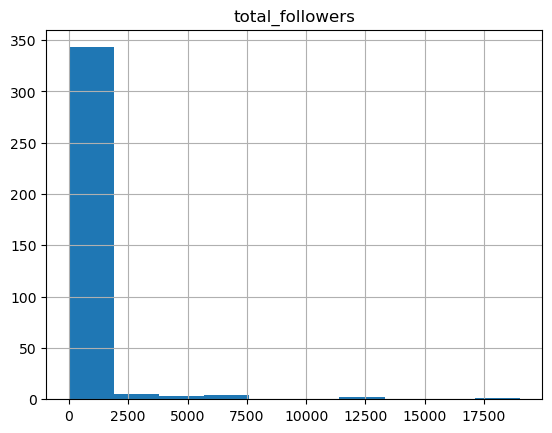

In [10]:
playlist_df[['total_followers']].hist()

## Refine the training data

In [11]:
top_playlists_df = playlist_df.groupby('genre').head(5)
top_playlists_df

,playlist_id,playlist_name,playlist_total_tracks,owner_id,owner_name,total_followers,genre
0,3GGq4AgCWovQf9unH4OeLA,OPM Acoustic Mellow Rock,201,12161669117,Jhaedz Torres,12834,opm acoustic
1,7aUxW4p4EiNx5wLGZ95BIf,OPM Acoustic Chill Songs 2022 💛,134,jyhra99st5nhex8kfo4um2dh7,buntala,11655,opm acoustic
2,5n8ydY3cQUNvo6VH6C9my7,OPM Acoustic R&B,73,12793915,Tintin Bautista,6403,opm acoustic
3,7vhpxu86i8iVG7PmxQtvuT,OPM Acoustic Love Songs/Ballads/Soul,311,226gg6cvmuobg2i3377x725xq,Philip Galvin,1811,opm acoustic
4,6QEpyMvzyeOlpyFDZTCVBg,OPM Acoustic,8,z9jnead90ofw0ty4iw8111dpr,binibining yena,1204,opm acoustic
0,1zMWC6xyvmk9QHVJqzEaoc,OPM Dance Hits 90's,120,12143167999,Leonel Delantar,885,opm dance
1,21SGN5LFobjfthLiLZMTj5,"Vic Sotto — Awitin Mo, Isasayaw Ko, Katawan, R...",24,22jpexxulea32ulfqijzru7oq,ED Songco Aban,850,opm dance
2,5A8dwL0CIRl4qQanHWf0eD,80's OPM DANCE MUSIC,24,12173395373,Francis Neil Guevarra Silo,608,opm dance
3,6lcAbGbLD9bgtI947TX656,OPM dance 2020 sayawan,21,ok0cxg1ry7yq6wzr53ijabrfc,ok0cxg1ry7yq6wzr53ijabrfc,523,opm dance
4,7krgBInDCA8bRIKdOOFsrw,OPM Dance Hits & 70's,39,12139705736,Sahlee Santiago,441,opm dance


In [12]:
tracks_df = tracks_df[tracks_df['playlist_id'].isin(top_playlists_df['playlist_id'].values)]
tracks_df['genre'].value_counts()

opm acoustic    654
opm indie       619
opm hugot       513
opm rock        498
opm hiphop      319
opm dance       216
opm jazz        207
opm reggae      192
opm folk        167
opm rnb         136
Name: genre, dtype: int64

## Feature Engineering

In [13]:
tracks_df['duration_mins']=tracks_df['duration']/60000

In [14]:
from sklearn.preprocessing import MinMaxScaler #RobustScaler
scaler = MinMaxScaler()

tracks_df['loudness'] = scaler.fit_transform(tracks_df[['loudness']])
tracks_df['loudness'].describe()

count    3521.000000
mean        0.637631
std         0.132401
min         0.000000
25%         0.558442
50%         0.657719
75%         0.733257
max         1.000000
Name: loudness, dtype: float64

In [15]:
tracks_df['tempo'] =  scaler.fit_transform(tracks_df[['tempo']])
#check
tracks_df['tempo'].describe()

count    3521.000000
mean        0.433882
std         0.177053
min         0.000000
25%         0.292543
50%         0.447305
75%         0.553087
max         1.000000
Name: tempo, dtype: float64

In [16]:
tracks_df["genre"] = tracks_df["genre"].astype('category')
tracks_df.dtypes

track_id              object
track_name            object
artist_id             object
artist_name           object
album_id              object
duration               int64
release_date          object
popularity             int64
danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
playlist_id           object
genre               category
playlist_name         object
duration_mins        float64
dtype: object

In [17]:
tracks_df['genre'].value_counts()

opm acoustic    654
opm indie       619
opm hugot       513
opm rock        498
opm hiphop      319
opm dance       216
opm jazz        207
opm reggae      192
opm folk        167
opm rnb         136
Name: genre, dtype: int64

In [18]:
tracks_df['genre_id'] = tracks_df["genre"].cat.codes
tracks_df

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,genre,playlist_name,duration_mins,genre_id
0,6NFKf8vBApSvtzkapYmnVR,Tadhana,3wbCeEPAW6po7J46netxMT,Up Dharma Down,4SjshYHT8OeSHB6zun2Hxx,222446,2012-12-07,17,0.686,0.3220,...,0.1650,0.029600,0.0809,0.511,0.653890,3GGq4AgCWovQf9unH4OeLA,opm acoustic,OPM Acoustic Mellow Rock,3.707433,0
1,3WgYEnpYw6n1o3JOuHPUxF,Sana,3wbCeEPAW6po7J46netxMT,Up Dharma Down,79lTnARkFpPsL8KJpV9UKI,280146,2009-02-05,5,0.731,0.4780,...,0.3910,0.000007,0.1660,0.606,0.186469,3GGq4AgCWovQf9unH4OeLA,opm acoustic,OPM Acoustic Mellow Rock,4.669100,0
2,3RYpfzRDiCTPESz7yBLT0e,Colour Everywhere,4U78sK2D3zASSB6oSR38GQ,Christian Bautista,0qEwvzXNVsPFK7eftFej7Q,253173,2004-03-25,47,0.730,0.4330,...,0.7300,0.000000,0.1280,0.440,0.466193,3GGq4AgCWovQf9unH4OeLA,opm acoustic,OPM Acoustic Mellow Rock,4.219550,0
3,29xs643Q96uQLD8f7SxYYw,Sa'yo,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,4xxRoePLdITFIhrzUhmOaQ,253360,2013-06-11,1,0.567,0.0896,...,0.7960,0.000000,0.2180,0.367,0.174180,3GGq4AgCWovQf9unH4OeLA,opm acoustic,OPM Acoustic Mellow Rock,4.222667,0
4,2Pelm9xgLSC78mRk0jbOKb,Sila - Acoustic,0jKQrxK2zHqxyOAyIMrUQt,SUD,1HHK0oozKwo9piao0wO25d,319608,2016-03-18,48,0.751,0.2810,...,0.7430,0.000000,0.2600,0.386,0.460136,3GGq4AgCWovQf9unH4OeLA,opm acoustic,OPM Acoustic Mellow Rock,5.326800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,64vIs3QieeCKFZ77yTXvhV,High,4wdD4hOZM4Aj6Ud0YYr6w4,The Speaks,66i7VsYk4nCTBG0w3zuDAv,270293,2005-01-01,51,0.487,0.5490,...,0.0991,0.000000,0.2950,0.268,0.753029,0PrNkmzeKii79HFVM3JJdA,opm rock,OPM ROCK BANDS,4.504883,9
759,2YM9HMnW0zcYVKrh3bVpDt,Sayang,2XHTklRsNMOOQT56Zm3WS4,Parokya Ni Edgar,29tJR2oXdGAFHMQkcgPUmn,180200,1997,47,0.547,0.6260,...,0.4440,0.002870,0.1560,0.862,0.475379,0PrNkmzeKii79HFVM3JJdA,opm rock,OPM ROCK BANDS,3.003333,9
760,3qDiPyExUOEDOX7QS6nKiN,Panalangin,2kZThDGZcHl4klYYFk0v8n,Moonstar88,6CJt6Orq8PLXFFAjvD8wyD,232986,2006,50,0.566,0.3150,...,0.5420,0.000000,0.1200,0.260,0.367005,0PrNkmzeKii79HFVM3JJdA,opm rock,OPM ROCK BANDS,3.883100,9
762,4NjS2z98pXSuBTrEQya3w8,Maselang Bahaghari,7374lH6kwx9uQATYQ9H3Cp,Eraserheads,3PHIP06HdZkoQkYsdejC53,208480,1999-05-18,48,0.378,0.4210,...,0.3640,0.000002,0.1300,0.246,0.221995,0PrNkmzeKii79HFVM3JJdA,opm rock,OPM ROCK BANDS,3.474667,9


In [19]:
tracks_df[['genre_id','genre']].drop_duplicates().set_index('genre_id').to_dict()['genre']

{0: 'opm acoustic',
 1: 'opm dance',
 2: 'opm folk',
 3: 'opm hiphop',
 4: 'opm hugot',
 5: 'opm indie',
 6: 'opm jazz',
 8: 'opm rnb',
 7: 'opm reggae',
 9: 'opm rock'}

In [20]:
genre_lookup = dict(tracks_df.groupby('genre_id').head(1)[['genre_id','genre']].sort_values('genre_id').values)
genre_lookup

{0: 'opm acoustic',
 1: 'opm dance',
 2: 'opm folk',
 3: 'opm hiphop',
 4: 'opm hugot',
 5: 'opm indie',
 6: 'opm jazz',
 7: 'opm reggae',
 8: 'opm rnb',
 9: 'opm rock'}

In [21]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']

In [42]:
columns_to_view = ['artist_name', 'track_name', 'genre_id', 'energy']
df_features = tracks_df[columns_to_view].copy()

# set multiindex
df_features = df_features.set_index(['track_name', 'artist_name', 'genre_id'])
#df_features.stack()
# reshape by pd.stack to achieve shape demanded by boxplot
df_features_stacked = pd.DataFrame({'value': df_features.stack()})
# # reset index
df_features_stacked = df_features_stacked.reset_index()
# # rename level_3
df_features_stacked = df_features_stacked.rename(columns={'level_3': 'feature'})
df_features_stacked[df_features_stacked['genre_id'] == 5]

,track_name,artist_name,genre_id,feature,value
1869,"Irreversible, an Intro",Moon Mask,5,energy,0.678
1870,Walls,Capacities,5,energy,0.409
1871,Appalled and Disgusted,Loop,5,energy,0.592
1872,Keep Dancing,Caffeine and Taurine,5,energy,0.354
1873,December 2 Chapter VII,Taken by Cars,5,energy,0.937
...,...,...,...,...,...
2483,Muling Nakita Ka,FERODINA,5,energy,0.493
2484,Mayari,Ace Banzuelo,5,energy,0.661
2485,Alone,Martti Franca,5,energy,0.433
2486,Ginhawa,SUD,5,energy,0.557


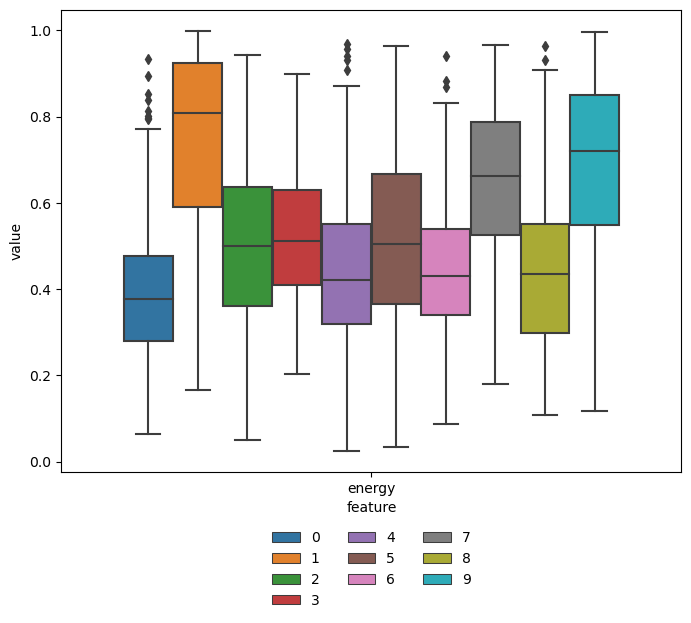

In [43]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

sns.boxplot(data=df_features_stacked, x='feature', y= 'value',  hue='genre_id', ax=ax,
            hue_order= [0,1,2,3,4,5,6,7,8,9])

ax.legend(loc='upper center', bbox_to_anchor=(
   0.5, -0.1), frameon=False, ncol=3)

In [44]:
columns_to_view = ['artist_name', 'track_name', 'genre_id', 'danceability']
df_features = tracks_df[columns_to_view].copy()

# set multiindex
df_features = df_features.set_index(['track_name', 'artist_name', 'genre_id'])
#df_features.stack()
# reshape by pd.stack to achieve shape demanded by boxplot
df_features_stacked = pd.DataFrame({'value': df_features.stack()})
# # reset index
df_features_stacked = df_features_stacked.reset_index()
# # rename level_3
df_features_stacked = df_features_stacked.rename(columns={'level_3': 'feature'})
df_features_stacked[df_features_stacked['genre_id'] == 5]

,track_name,artist_name,genre_id,feature,value
1869,"Irreversible, an Intro",Moon Mask,5,danceability,0.472
1870,Walls,Capacities,5,danceability,0.589
1871,Appalled and Disgusted,Loop,5,danceability,0.579
1872,Keep Dancing,Caffeine and Taurine,5,danceability,0.511
1873,December 2 Chapter VII,Taken by Cars,5,danceability,0.236
...,...,...,...,...,...
2483,Muling Nakita Ka,FERODINA,5,danceability,0.699
2484,Mayari,Ace Banzuelo,5,danceability,0.514
2485,Alone,Martti Franca,5,danceability,0.408
2486,Ginhawa,SUD,5,danceability,0.685


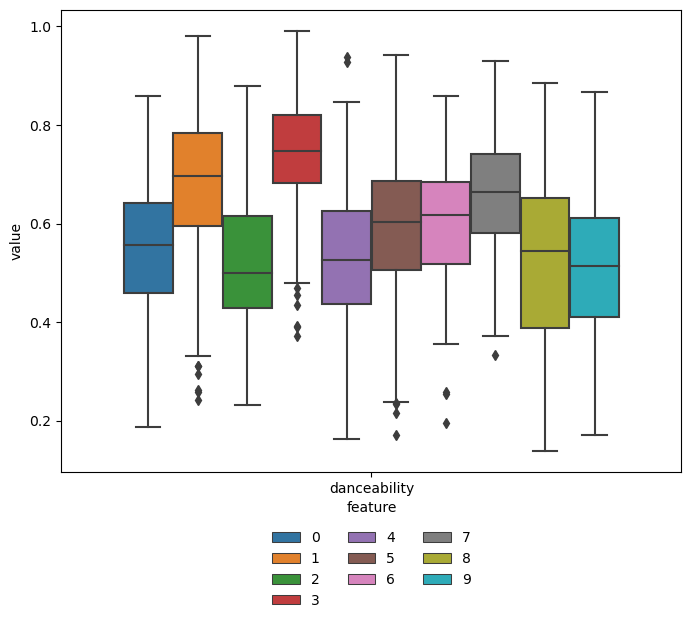

In [45]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

sns.boxplot(data=df_features_stacked, x='feature', y= 'value',  hue='genre_id', ax=ax,
            hue_order= [0,1,2,3,4,5,6,7,8,9])

ax.legend(loc='upper center', bbox_to_anchor=(
   0.5, -0.1), frameon=False, ncol=3)

In [46]:
columns_to_view = ['artist_name', 'track_name', 'genre_id', 'loudness']
df_features = tracks_df[columns_to_view].copy()

# set multiindex
df_features = df_features.set_index(['track_name', 'artist_name', 'genre_id'])
#df_features.stack()
# reshape by pd.stack to achieve shape demanded by boxplot
df_features_stacked = pd.DataFrame({'value': df_features.stack()})
# # reset index
df_features_stacked = df_features_stacked.reset_index()
# # rename level_3
df_features_stacked = df_features_stacked.rename(columns={'level_3': 'feature'})
df_features_stacked[df_features_stacked['genre_id'] == 5]

,track_name,artist_name,genre_id,feature,value
1869,"Irreversible, an Intro",Moon Mask,5,loudness,0.448357
1870,Walls,Capacities,5,loudness,0.532739
1871,Appalled and Disgusted,Loop,5,loudness,0.668645
1872,Keep Dancing,Caffeine and Taurine,5,loudness,0.491668
1873,December 2 Chapter VII,Taken by Cars,5,loudness,0.851792
...,...,...,...,...,...
2483,Muling Nakita Ka,FERODINA,5,loudness,0.684484
2484,Mayari,Ace Banzuelo,5,loudness,0.705078
2485,Alone,Martti Franca,5,loudness,0.730742
2486,Ginhawa,SUD,5,loudness,0.712663


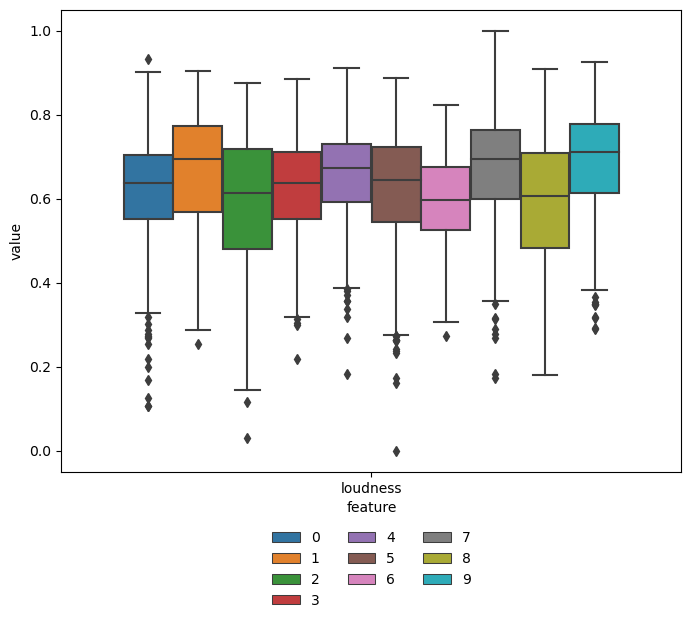

In [47]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

sns.boxplot(data=df_features_stacked, x='feature', y= 'value',  hue='genre_id', ax=ax,
            hue_order= [0,1,2,3,4,5,6,7,8,9])

ax.legend(loc='upper center', bbox_to_anchor=(
   0.5, -0.1), frameon=False, ncol=3)

In [48]:
columns_to_view = ['artist_name', 'track_name', 'genre_id', 'acousticness']
df_features = tracks_df[columns_to_view].copy()

# set multiindex
df_features = df_features.set_index(['track_name', 'artist_name', 'genre_id'])
#df_features.stack()
# reshape by pd.stack to achieve shape demanded by boxplot
df_features_stacked = pd.DataFrame({'value': df_features.stack()})
# # reset index
df_features_stacked = df_features_stacked.reset_index()
# # rename level_3
df_features_stacked = df_features_stacked.rename(columns={'level_3': 'feature'})
df_features_stacked[df_features_stacked['genre_id'] == 5]

,track_name,artist_name,genre_id,feature,value
1869,"Irreversible, an Intro",Moon Mask,5,acousticness,0.932000
1870,Walls,Capacities,5,acousticness,0.011300
1871,Appalled and Disgusted,Loop,5,acousticness,0.111000
1872,Keep Dancing,Caffeine and Taurine,5,acousticness,0.040100
1873,December 2 Chapter VII,Taken by Cars,5,acousticness,0.001890
...,...,...,...,...,...
2483,Muling Nakita Ka,FERODINA,5,acousticness,0.486000
2484,Mayari,Ace Banzuelo,5,acousticness,0.000994
2485,Alone,Martti Franca,5,acousticness,0.457000
2486,Ginhawa,SUD,5,acousticness,0.259000


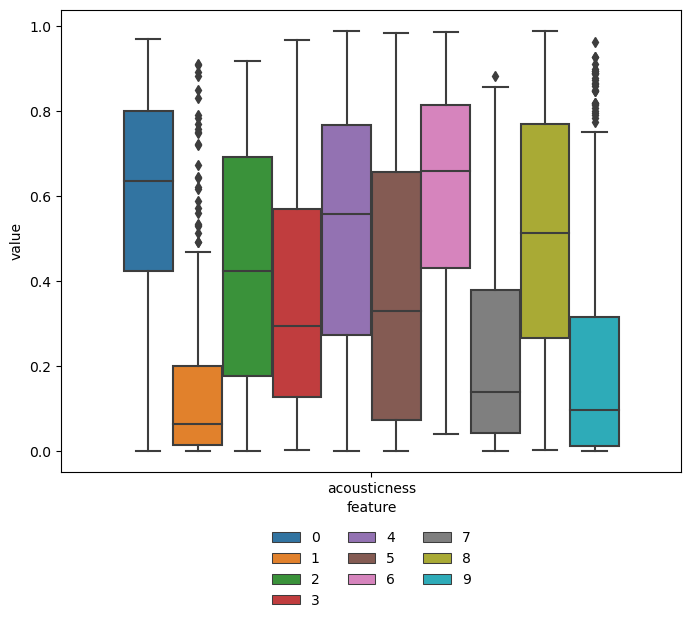

In [49]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

sns.boxplot(data=df_features_stacked, x='feature', y= 'value',  hue='genre_id', ax=ax,
            hue_order= [0,1,2,3,4,5,6,7,8,9])

ax.legend(loc='upper center', bbox_to_anchor=(
   0.5, -0.1), frameon=False, ncol=3)

In [50]:
columns_to_view = ['artist_name', 'track_name', 'genre_id', 'liveness']
df_features = tracks_df[columns_to_view].copy()

# set multiindex
df_features = df_features.set_index(['track_name', 'artist_name', 'genre_id'])
#df_features.stack()
# reshape by pd.stack to achieve shape demanded by boxplot
df_features_stacked = pd.DataFrame({'value': df_features.stack()})
# # reset index
df_features_stacked = df_features_stacked.reset_index()
# # rename level_3
df_features_stacked = df_features_stacked.rename(columns={'level_3': 'feature'})
df_features_stacked[df_features_stacked['genre_id'] == 5]

,track_name,artist_name,genre_id,feature,value
1869,"Irreversible, an Intro",Moon Mask,5,liveness,0.1170
1870,Walls,Capacities,5,liveness,0.0742
1871,Appalled and Disgusted,Loop,5,liveness,0.1010
1872,Keep Dancing,Caffeine and Taurine,5,liveness,0.1280
1873,December 2 Chapter VII,Taken by Cars,5,liveness,0.2920
...,...,...,...,...,...
2483,Muling Nakita Ka,FERODINA,5,liveness,0.1750
2484,Mayari,Ace Banzuelo,5,liveness,0.2880
2485,Alone,Martti Franca,5,liveness,0.2960
2486,Ginhawa,SUD,5,liveness,0.1140


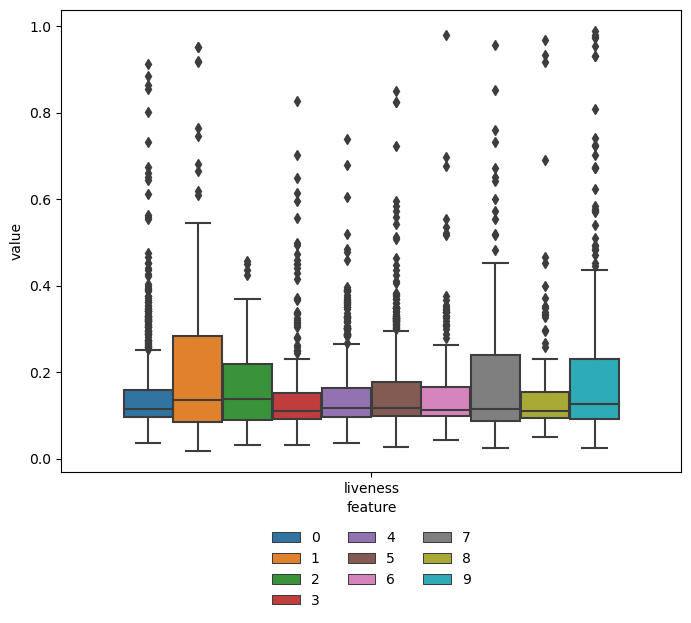

In [51]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

sns.boxplot(data=df_features_stacked, x='feature', y= 'value',  hue='genre_id', ax=ax,
            hue_order= [0,1,2,3,4,5,6,7,8,9])

ax.legend(loc='upper center', bbox_to_anchor=(
   0.5, -0.1), frameon=False, ncol=3)

In [52]:
columns_to_view = ['artist_name', 'track_name', 'genre_id', 'valence']
df_features = tracks_df[columns_to_view].copy()

# set multiindex
df_features = df_features.set_index(['track_name', 'artist_name', 'genre_id'])
#df_features.stack()
# reshape by pd.stack to achieve shape demanded by boxplot
df_features_stacked = pd.DataFrame({'value': df_features.stack()})
# # reset index
df_features_stacked = df_features_stacked.reset_index()
# # rename level_3
df_features_stacked = df_features_stacked.rename(columns={'level_3': 'feature'})
df_features_stacked[df_features_stacked['genre_id'] == 5]

,track_name,artist_name,genre_id,feature,value
1869,"Irreversible, an Intro",Moon Mask,5,valence,0.6950
1870,Walls,Capacities,5,valence,0.4120
1871,Appalled and Disgusted,Loop,5,valence,0.6100
1872,Keep Dancing,Caffeine and Taurine,5,valence,0.5730
1873,December 2 Chapter VII,Taken by Cars,5,valence,0.4870
...,...,...,...,...,...
2483,Muling Nakita Ka,FERODINA,5,valence,0.5500
2484,Mayari,Ace Banzuelo,5,valence,0.0674
2485,Alone,Martti Franca,5,valence,0.3440
2486,Ginhawa,SUD,5,valence,0.5450


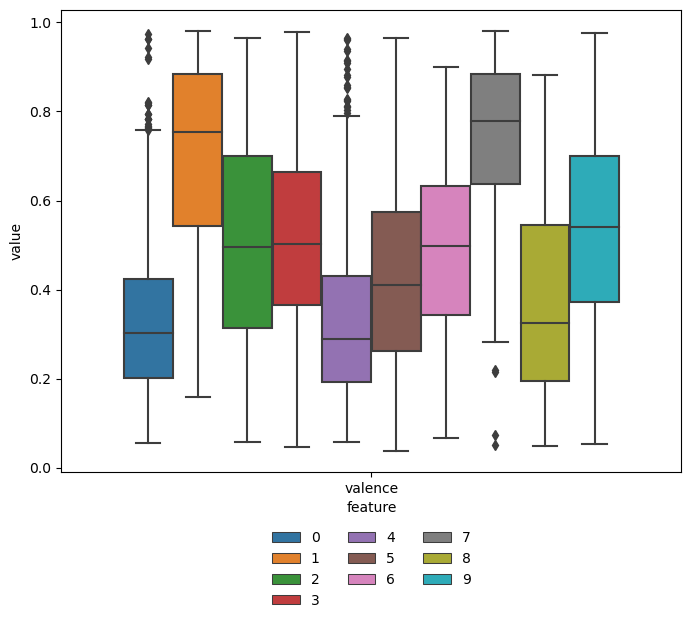

In [53]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

sns.boxplot(data=df_features_stacked, x='feature', y= 'value',  hue='genre_id', ax=ax,
            hue_order= [0,1,2,3,4,5,6,7,8,9])

ax.legend(loc='upper center', bbox_to_anchor=(
   0.5, -0.1), frameon=False, ncol=3)

In [54]:
columns_to_view = ['artist_name', 'track_name', 'genre_id', 'tempo']
df_features = tracks_df[columns_to_view].copy()

# set multiindex
df_features = df_features.set_index(['track_name', 'artist_name', 'genre_id'])
#df_features.stack()
# reshape by pd.stack to achieve shape demanded by boxplot
df_features_stacked = pd.DataFrame({'value': df_features.stack()})
# # reset index
df_features_stacked = df_features_stacked.reset_index()
# # rename level_3
df_features_stacked = df_features_stacked.rename(columns={'level_3': 'feature'})
df_features_stacked[df_features_stacked['genre_id'] == 5]

,track_name,artist_name,genre_id,feature,value
1869,"Irreversible, an Intro",Moon Mask,5,tempo,0.429595
1870,Walls,Capacities,5,tempo,0.379643
1871,Appalled and Disgusted,Loop,5,tempo,0.241812
1872,Keep Dancing,Caffeine and Taurine,5,tempo,0.803779
1873,December 2 Chapter VII,Taken by Cars,5,tempo,0.615609
...,...,...,...,...,...
2483,Muling Nakita Ka,FERODINA,5,tempo,0.211626
2484,Mayari,Ace Banzuelo,5,tempo,0.292238
2485,Alone,Martti Franca,5,tempo,0.334308
2486,Ginhawa,SUD,5,tempo,0.516776


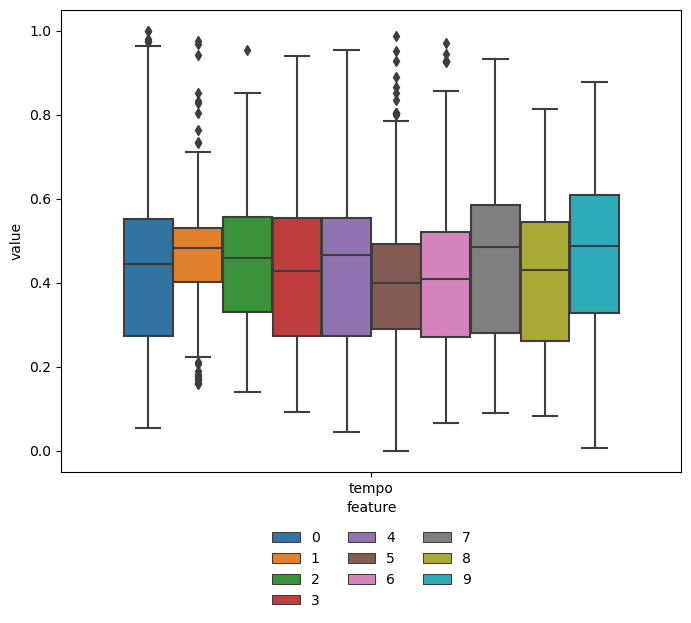

In [55]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

sns.boxplot(data=df_features_stacked, x='feature', y= 'value',  hue='genre_id', ax=ax,
            hue_order= [0,1,2,3,4,5,6,7,8,9])

ax.legend(loc='upper center', bbox_to_anchor=(
   0.5, -0.1), frameon=False, ncol=3)

In [56]:
columns_to_view = ['artist_name', 'track_name', 'genre_id', 'instrumentalness']
df_features = tracks_df[columns_to_view].copy()

# set multiindex
df_features = df_features.set_index(['track_name', 'artist_name', 'genre_id'])
#df_features.stack()
# reshape by pd.stack to achieve shape demanded by boxplot
df_features_stacked = pd.DataFrame({'value': df_features.stack()})
# # reset index
df_features_stacked = df_features_stacked.reset_index()
# # rename level_3
df_features_stacked = df_features_stacked.rename(columns={'level_3': 'feature'})
df_features_stacked[df_features_stacked['genre_id'] == 5]

,track_name,artist_name,genre_id,feature,value
1869,"Irreversible, an Intro",Moon Mask,5,instrumentalness,0.945000
1870,Walls,Capacities,5,instrumentalness,0.450000
1871,Appalled and Disgusted,Loop,5,instrumentalness,0.478000
1872,Keep Dancing,Caffeine and Taurine,5,instrumentalness,0.000092
1873,December 2 Chapter VII,Taken by Cars,5,instrumentalness,0.681000
...,...,...,...,...,...
2483,Muling Nakita Ka,FERODINA,5,instrumentalness,0.000003
2484,Mayari,Ace Banzuelo,5,instrumentalness,0.000000
2485,Alone,Martti Franca,5,instrumentalness,0.000000
2486,Ginhawa,SUD,5,instrumentalness,0.000000


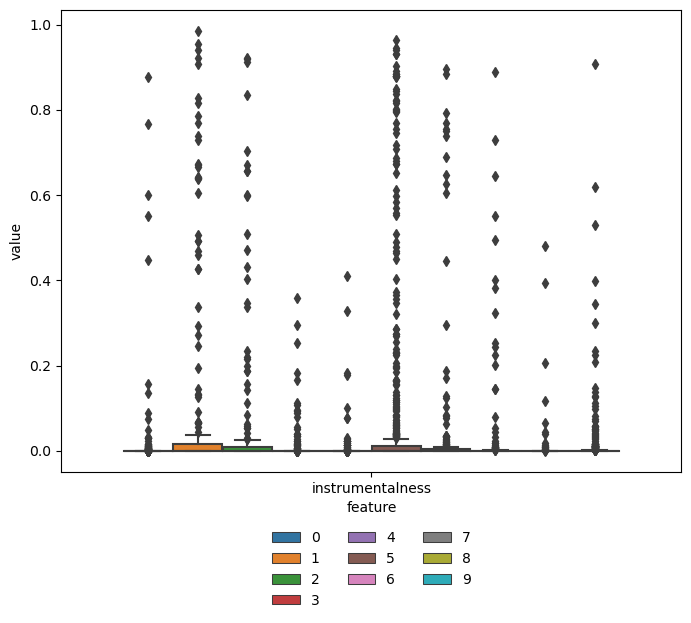

In [57]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

sns.boxplot(data=df_features_stacked, x='feature', y= 'value',  hue='genre_id', ax=ax,
            hue_order= [0,1,2,3,4,5,6,7,8,9])

ax.legend(loc='upper center', bbox_to_anchor=(
   0.5, -0.1), frameon=False, ncol=3)

In [58]:
columns_to_view = ['artist_name', 'track_name', 'genre_id', 'speechiness']
df_features = tracks_df[columns_to_view].copy()

# set multiindex
df_features = df_features.set_index(['track_name', 'artist_name', 'genre_id'])
#df_features.stack()
# reshape by pd.stack to achieve shape demanded by boxplot
df_features_stacked = pd.DataFrame({'value': df_features.stack()})
# # reset index
df_features_stacked = df_features_stacked.reset_index()
# # rename level_3
df_features_stacked = df_features_stacked.rename(columns={'level_3': 'feature'})
df_features_stacked[df_features_stacked['genre_id'] == 5]

,track_name,artist_name,genre_id,feature,value
1869,"Irreversible, an Intro",Moon Mask,5,speechiness,0.0379
1870,Walls,Capacities,5,speechiness,0.0274
1871,Appalled and Disgusted,Loop,5,speechiness,0.0264
1872,Keep Dancing,Caffeine and Taurine,5,speechiness,0.0297
1873,December 2 Chapter VII,Taken by Cars,5,speechiness,0.0666
...,...,...,...,...,...
2483,Muling Nakita Ka,FERODINA,5,speechiness,0.0387
2484,Mayari,Ace Banzuelo,5,speechiness,0.0296
2485,Alone,Martti Franca,5,speechiness,0.0294
2486,Ginhawa,SUD,5,speechiness,0.0582


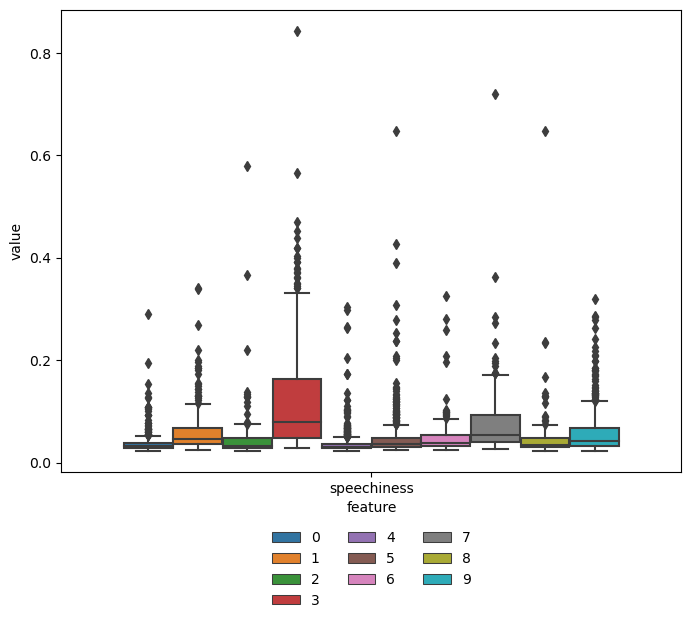

In [59]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

sns.boxplot(data=df_features_stacked, x='feature', y= 'value',  hue='genre_id', ax=ax,
            hue_order= [0,1,2,3,4,5,6,7,8,9])

ax.legend(loc='upper center', bbox_to_anchor=(
   0.5, -0.1), frameon=False, ncol=3)

In [60]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,roc_curve, auc, confusion_matrix, classification_report,\
    ConfusionMatrixDisplay, plot_roc_curve

In [61]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [62]:
# create feature matrix (X)
# pick energy and tempo as features
feature_cols = ['danceability', 'energy', 'acousticness', 'valence']
X = tracks_df[feature_cols]
y = tracks_df['genre_id']
print(len(X),len(y))

3521 3521


## Model Tuning KNN

In [63]:
#check indices used in folds
KFOLDS=5
kf = KFold(n_splits=KFOLDS)
for i,(train, test) in enumerate(kf.split(X)):
    #generate indices to use for the k-fold splits
    full_range = np.arange(len(X)).tolist()
    gap = [x for x in full_range if x not in train]
    if (i>0)&(i<KFOLDS-1):
        print("K=%d, train idx: %d-%d, %d-%d (n=%d), test idx:  %d-%d (n=%d)" % (i, min(train), min(gap), max(gap), max(train),len(train),\
                                                                     min(test), max(test), len(test)))
    else:
         print("K=%d, train idx: %d-%d (n=%d), test idx:  %d-%d (n=%d)" % (i, min(train), max(train),len(train),\
                                                                     min(test), max(test), len(test)))

K=0, train idx: 705-3520 (n=2816), test idx:  0-704 (n=705)
K=1, train idx: 0-705, 1408-3520 (n=2817), test idx:  705-1408 (n=704)
K=2, train idx: 0-1409, 2112-3520 (n=2817), test idx:  1409-2112 (n=704)
K=3, train idx: 0-2113, 2816-3520 (n=2817), test idx:  2113-2816 (n=704)
K=4, train idx: 0-2816 (n=2817), test idx:  2817-3520 (n=704)


In [64]:
n_neighbors = np.arange(2,51)
KFOLDS = 5

cv_scores_mean = []
cv_scores_std = []

for K in n_neighbors:
    print('Fitting KNN with K=%d ...' % K, end='')
    #initialize model
    knn_model = KNeighborsClassifier(n_neighbors=K)
    # get accuracy metric across train-test sets generated using k-folds
    scores = cross_val_score(knn_model, X, y, cv=KFOLDS, scoring='accuracy')
    # overall accuracy score of K is mean of accuracy scores per k-fold
    # std dev of scores across folds must be a minimum
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())
    print('DONE!')

Fitting KNN with K=2 ...DONE!
Fitting KNN with K=3 ...DONE!
Fitting KNN with K=4 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=5 ...DONE!
Fitting KNN with K=6 ...DONE!
Fitting KNN with K=7 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=8 ...DONE!
Fitting KNN with K=9 ...DONE!
Fitting KNN with K=10 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=11 ...DONE!
Fitting KNN with K=12 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=13 ...DONE!
Fitting KNN with K=14 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=15 ...DONE!
Fitting KNN with K=16 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=17 ...DONE!
Fitting KNN with K=18 ...DONE!
Fitting KNN with K=19 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=20 ...DONE!
Fitting KNN with K=21 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=22 ...DONE!
Fitting KNN with K=23 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=24 ...DONE!
Fitting KNN with K=25 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=26 ...DONE!
Fitting KNN with K=27 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=28 ...DONE!
Fitting KNN with K=29 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=30 ...DONE!
Fitting KNN with K=31 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=32 ...DONE!
Fitting KNN with K=33 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=34 ...DONE!
Fitting KNN with K=35 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=36 ...DONE!
Fitting KNN with K=37 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=38 ...DONE!
Fitting KNN with K=39 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=40 ...DONE!
Fitting KNN with K=41 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=42 ...DONE!
Fitting KNN with K=43 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=44 ...DONE!
Fitting KNN with K=45 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=46 ...DONE!
Fitting KNN with K=47 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=48 ...DONE!
Fitting KNN with K=49 ...

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWa

DONE!
Fitting KNN with K=50 ...DONE!


C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


The optimal number of neighbors is 32.00 with accuracy 0.3351


Text(0, 0.5, 'Accuracy standard deviation')

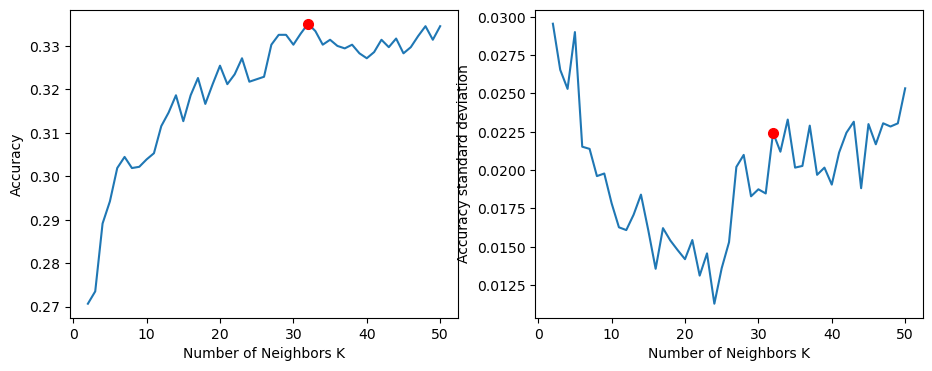

In [65]:
# determining best K
idx_max_accuracy = cv_scores_mean.index(max(cv_scores_mean))
optimal_K = n_neighbors[idx_max_accuracy]
print("The optimal number of neighbors is %0.2f with accuracy %0.4f" % (optimal_K, cv_scores_mean[idx_max_accuracy]))

# plot metrics 
fig,axs = plt.subplots(1,2, figsize=(11,4))
axs[0].plot(n_neighbors, cv_scores_mean)
axs[0].plot(optimal_K,max(cv_scores_mean), marker="o", ms=7, color='r')
axs[0].set_xlabel("Number of Neighbors K")
axs[0].set_ylabel("Accuracy")

axs[1].plot(n_neighbors, cv_scores_std)
axs[1].plot(optimal_K,cv_scores_std[idx_max_accuracy], marker="o", ms=7, color='r')
axs[1].set_xlabel("Number of Neighbors K")
axs[1].set_ylabel("Accuracy standard deviation")


In [66]:
#initialize KNN with optimal K
knn_optimal_model = KNeighborsClassifier(n_neighbors=optimal_K)
# fitting the model with entire dataset
knn_optimal_model.fit(X, y)
#use model to predict y
knn_ypred = knn_optimal_model.predict(X)

C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [67]:
# evaluate accuracy
acc = accuracy_score(y, knn_ypred) * 100
print('\nThe accuracy of the knn classifier for the full dataset using k = %d is %f%%' % (optimal_K, acc))


The accuracy of the knn classifier for the full dataset using k = 32 is 38.852599%


## Model Tuning SVM

Linear Kernel

In [68]:
def plot_scores(cv_scores_mean,cv_scores_std):
    fig,axs = plt.subplots(1,2, figsize=(11,4))
    
    x = np.arange(len(cv_scores_mean))
    max_mean_score_idx = cv_scores_mean.argmax()
    
    axs[0].plot(x, cv_scores_mean, marker='.', lw=0)
    axs[0].plot(x[max_mean_score_idx],max(cv_scores_mean), marker="o", ms=7, color='r')
    axs[0].set_xlabel("Model config type")
    axs[0].set_ylabel("Accuracy")

    axs[1].plot(x, cv_scores_std, marker='.', lw=0)
    axs[1].plot(x[max_mean_score_idx],cv_scores_std[max_mean_score_idx], marker="o", ms=7, color='r')
    axs[1].set_xlabel("Model config type")
    axs[1].set_ylabel("Accuracy standard deviation")

In [69]:
#Linear kernel
print('Fitting SVM with linear kernel...')

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['linear']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1, cv = KFOLDS )
# fitting the model for grid search
grid.fit(X, y)

#get scores
cv_scores_mean =  grid.cv_results_['mean_test_score']
cv_scores_std = grid.cv_results_['std_test_score']
max_mean_score_idx = cv_scores_mean.argmax()

print('Best model config score is %f%% (vs. overall mean score: %f )' % (100*cv_scores_mean[max_mean_score_idx],
                                                                        100*np.mean(cv_scores_mean)))
print('Std of best model score across folds is %f (vs. overall mean std: %f )' %\
      (cv_scores_std[max_mean_score_idx], np.mean(cv_scores_std)))

# get best model
svm_model1 = grid.best_estimator_
# fit model for entire data
svm_model1.fit(X, y)
pred1 = svm_model1.predict(X)
acc = accuracy_score(y, pred1) * 100
print('The accuracy of the SVM classifier for the full dataset is %f%%' % (acc))
print('DONE!')

Fitting SVM with linear kernel...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best model config score is 34.508462% (vs. overall mean score: 33.077055 )
Std of best model score across folds is 0.033326 (vs. overall mean std: 0.033428 )
The accuracy of the SVM classifier for the full dataset is 35.700085%
DONE!


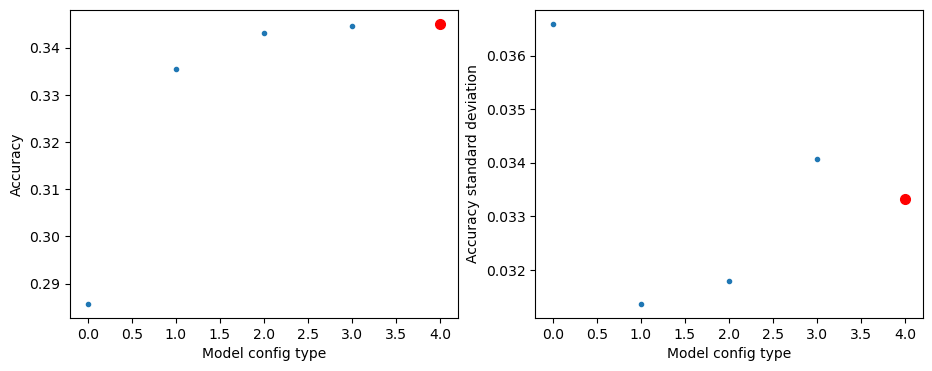

In [70]:
plot_scores(cv_scores_mean,cv_scores_std)

Polynomial Kernel

In [71]:
# defining parameter range
print('Fitting SVM with a polynomial kernel...')

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'degree': [2,3],
              'kernel': ['poly']}
#1 worker:  12 mins
#2 workers: 8.6 mins
#3 workers: 7.1 mins
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1, cv = KFOLDS, n_jobs=2)
# fitting the model for grid search
grid.fit(X, y)
print('Best model is %s' % grid.best_estimator_)

#get scores
cv_scores_mean =  grid.cv_results_['mean_test_score']
cv_scores_std = grid.cv_results_['std_test_score']
max_mean_score_idx = cv_scores_mean.argmax()

print('Best model config score is %f%% (vs. overall mean score: %f )' % (100*cv_scores_mean[max_mean_score_idx],
                                                                        100*np.mean(cv_scores_mean)))
print('Std of best model score across folds is %f (vs. overall mean std: %f )' %\
      (cv_scores_std[max_mean_score_idx], np.mean(cv_scores_std)))

# get best model
svm_model2 = grid.best_estimator_
# fit model for entire data
svm_model2.fit(X, y)
pred2 = svm_model2.predict(X)
acc = accuracy_score(y, pred2) * 100
print('The accuracy of the SVM classifier for the full dataset is %f%%' % (acc))
print('DONE!')

Fitting SVM with a polynomial kernel...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best model is SVC(C=10, gamma=1, kernel='poly')
Best model config score is 34.649863% (vs. overall mean score: 23.934927 )
Std of best model score across folds is 0.019495 (vs. overall mean std: 0.009647 )
The accuracy of the SVM classifier for the full dataset is 35.813689%
DONE!


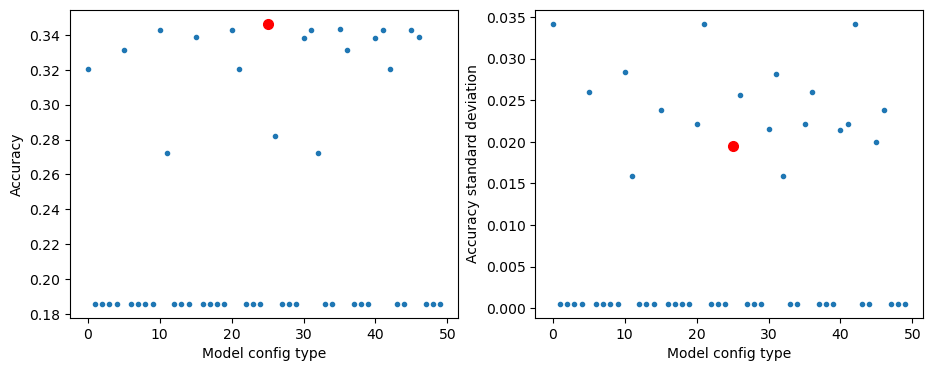

In [72]:
plot_scores(cv_scores_mean,cv_scores_std)

Radial Kernel

In [73]:
# defining parameter range
print('Fitting SVM with an rbf kernel...')

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1, cv = KFOLDS, n_jobs=2)
# fitting the model for grid search
grid.fit(X, y)
print('Best model is %s' % grid.best_estimator_)

#get scores
cv_scores_mean =  grid.cv_results_['mean_test_score']
cv_scores_std = grid.cv_results_['std_test_score']
max_mean_score_idx = cv_scores_mean.argmax()

print('Best model config score is %f%% (vs. overall mean score: %f )' % (100*cv_scores_mean[max_mean_score_idx],
                                                                        100*np.mean(cv_scores_mean)))
print('Std of best model score across folds is %f (vs. overall mean std: %f )' %\
      (cv_scores_std[max_mean_score_idx], np.mean(cv_scores_std)))

# get best model
svm_model3 = grid.best_estimator_
# fit model for entire data
svm_model3.fit(X, y)
pred3 = svm_model3.predict(X)
acc = accuracy_score(y, pred3) * 100
print('The accuracy of the SVM classifier for the full dataset is %f%%' % (acc))
print('DONE!')

Fitting SVM with an rbf kernel...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best model is SVC(C=10, gamma=1)
Best model config score is 35.047671% (vs. overall mean score: 28.341523 )
Std of best model score across folds is 0.024286 (vs. overall mean std: 0.020221 )
The accuracy of the SVM classifier for the full dataset is 36.608918%
DONE!


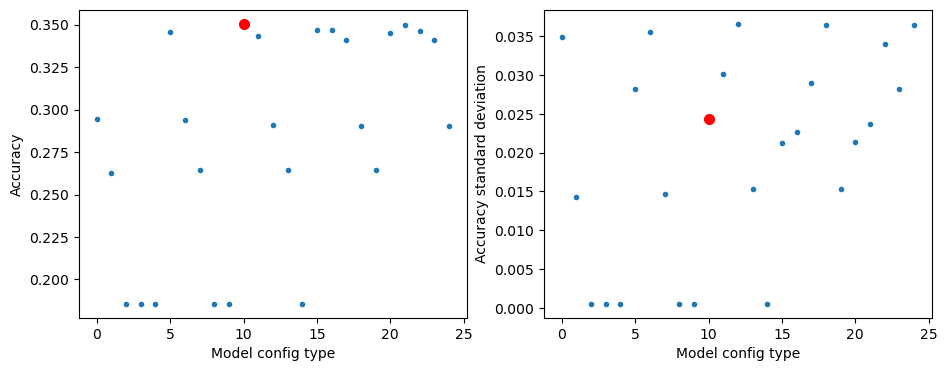

In [74]:
plot_scores(cv_scores_mean,cv_scores_std)

SVM Model Selection

In [75]:
svm_optimal_model = svm_model3
#set probability=True to view classification probabilities and refit
svm_optimal_model.probability=True
svm_optimal_model.fit(X, y)
#use model to predict y
svm_ypred = svm_optimal_model.predict(X)

Model Selection

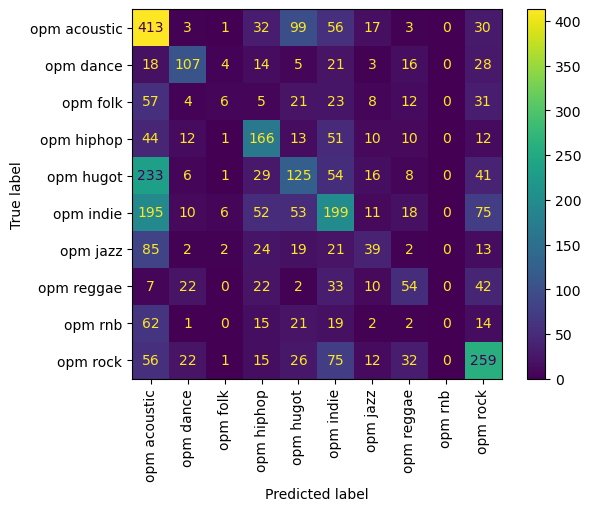

In [76]:
cm = confusion_matrix(y, knn_ypred)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(genre_lookup.values()))
cmd.plot(xticks_rotation=90)

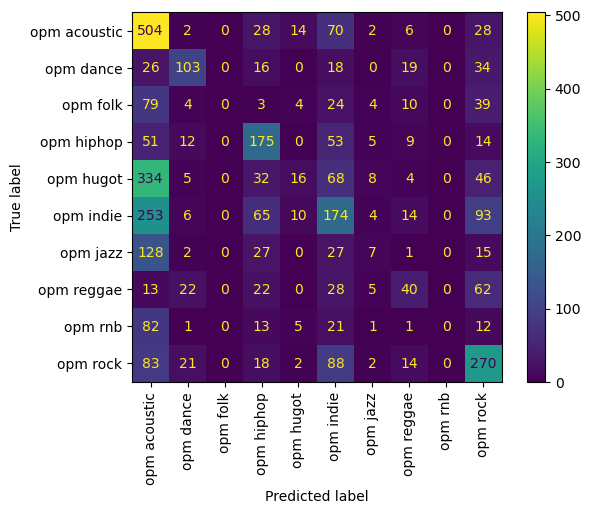

In [77]:
cm = confusion_matrix(y, svm_ypred)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(genre_lookup.values()))
cmd.plot(xticks_rotation=90)

In [78]:
genre_lookup

{0: 'opm acoustic',
 1: 'opm dance',
 2: 'opm folk',
 3: 'opm hiphop',
 4: 'opm hugot',
 5: 'opm indie',
 6: 'opm jazz',
 7: 'opm reggae',
 8: 'opm rnb',
 9: 'opm rock'}

In [79]:
print('-------------------------------------------------------------')
print('KNN')
print(classification_report(y,knn_ypred))
print('-------------------------------------------------------------')
print('SVM')
print(classification_report(y,svm_ypred))

-------------------------------------------------------------
KNN
              precision    recall  f1-score   support

           0       0.35      0.63      0.45       654
           1       0.57      0.50      0.53       216
           2       0.27      0.04      0.06       167
           3       0.44      0.52      0.48       319
           4       0.33      0.24      0.28       513
           5       0.36      0.32      0.34       619
           6       0.30      0.19      0.23       207
           7       0.34      0.28      0.31       192
           8       0.00      0.00      0.00       136
           9       0.48      0.52      0.50       498

    accuracy                           0.39      3521
   macro avg       0.34      0.32      0.32      3521
weighted avg       0.37      0.39      0.36      3521

-------------------------------------------------------------
SVM
              precision    recall  f1-score   support

           0       0.32      0.77      0.46       654


C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\sprint1\lib\site-packages\sklearn\metr